# Quantium Task-2 
* To understand performance of each trail stores 
* To compare the performance of each trail stores and other control stores
* To provide details about the driver of total sales in trail stores between more customer or more purchase by some customers

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline 

import numpy as np

In [4]:
qvi = pd.read_csv('QVI_data.csv')

In [5]:
qvi.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


Changing column name of Premium_customer to Customer_types

In [6]:
qvi = qvi.rename({'PREMIUM_CUSTOMER':'CUSTOMER_TYPES'}, axis = 1)

In [7]:
qvi.describe() # Summary od entire dataset

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
count,2.648340e+05,264834.000000,2.648340e+05,264834.000000,264834.000000,264834.000000,264834.000000
mean,1.355488e+05,135.079423,1.351576e+05,56.583554,1.905813,7.299346,182.425512
std,8.057990e+04,76.784063,7.813292e+04,32.826444,0.343436,2.527241,64.325148
min,1.000000e+03,1.000000,1.000000e+00,1.000000,1.000000,1.500000,70.000000
25%,7.002100e+04,70.000000,6.760050e+04,28.000000,2.000000,5.400000,150.000000
50%,1.303570e+05,130.000000,1.351365e+05,56.000000,2.000000,7.400000,170.000000
75%,2.030940e+05,203.000000,2.026998e+05,85.000000,2.000000,9.200000,175.000000
max,2.373711e+06,272.000000,2.415841e+06,114.000000,5.000000,29.500000,380.000000


In [8]:
qvi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LYLTY_CARD_NBR  264834 non-null  int64  
 1   DATE            264834 non-null  object 
 2   STORE_NBR       264834 non-null  int64  
 3   TXN_ID          264834 non-null  int64  
 4   PROD_NBR        264834 non-null  int64  
 5   PROD_NAME       264834 non-null  object 
 6   PROD_QTY        264834 non-null  int64  
 7   TOT_SALES       264834 non-null  float64
 8   PACK_SIZE       264834 non-null  int64  
 9   BRAND           264834 non-null  object 
 10  LIFESTAGE       264834 non-null  object 
 11  CUSTOMER_TYPES  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


In [9]:
# Lets change the datatype of 'DATE' column 

qvi["DATE"] = pd.to_datetime(qvi["DATE"])
qvi["YEARMONTH"] = qvi["DATE"].dt.strftime("%Y%m").astype("int")

 Lets create a function to calucate the following information for each store per month:-

*  Total sales
* Total num of customer
* Average transaction per customers
* Average chips purchased by a customer
* Average price of the chips

Also the function will create a dataframe for this information

In [39]:
def monthly_store_data():
    store_yr_mn = qvi.groupby(['STORE_NBR','YEARMONTH'])
    tot_sales_pr_month = store_yr_mn['TOT_SALES'].sum()
    tot_cust_pr_month = store_yr_mn['LYLTY_CARD_NBR'].unique()
    avg_trans_per_cust = store_yr_mn.size()/tot_cust_pr_month
    avg_chips_per_cust = store_yr_mn["PROD_QTY"].sum() / tot_cust_pr_month
    avg_chips_price = tot_sales_pr_month / store_yr_mn["PROD_QTY"].sum()
    values = [tot_sales_pr_month, tot_cust_pr_month, avg_trans_per_cust, avg_chips_per_cust, avg_chips_price]
    metrics = pd.concat(values, axis=1)
    metrics.columns = ["TOT_SALES", "nCustomers", "nTxnPerCust", "nChipsPerTxn", "avgPricePerUnit"]
    return metrics

In [40]:
# reset_index sets a column with 0 to caluese of data length as default index values

qvi_monthly_data = monthly_store_data().reset_index()  
qvi_monthly_data.head() 

,STORE_NBR,YEARMONTH,TOT_SALES,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
0,1,201807,206.9,"[1011, 1027, 1042, 1055, 1057, 1068, 1072, 108...","[0.051434223541048464, 0.05063291139240506, 0....","[0.06132542037586548, 0.06037000973709834, 0.0...",3.337097
1,1,201808,176.1,"[1020, 1027, 1048, 1053, 1114, 1118, 1122, 114...","[0.04215686274509804, 0.04186952288218111, 0.0...","[0.052941176470588235, 0.05258033106134372, 0....",3.261111
2,1,201809,278.8,"[1002, 1010, 1018, 1048, 1051, 1052, 1057, 106...","[0.06187624750499002, 0.061386138613861385, 0....","[0.0748502994011976, 0.07425742574257425, 0.07...",3.717333
3,1,201810,188.1,"[1000, 1020, 1022, 1039, 1060, 1067, 1094, 109...","[0.045, 0.04411764705882353, 0.044031311154598...","[0.058, 0.056862745098039215, 0.05675146771037...",3.243103
4,1,201811,192.6,"[1004, 1009, 1011, 1018, 1025, 1054, 1062, 108...","[0.046812749003984064, 0.04658077304261645, 0....","[0.05677290836653386, 0.05649157581764123, 0.0...",3.378947


In [36]:
qvi_monthly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3169 entries, 0 to 3168
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STORE_NBR        3169 non-null   int64  
 1   YEARMONTH        3169 non-null   int64  
 2   TOT_SALES        3169 non-null   float64
 3   nCustomers       3169 non-null   object 
 4   nTxnPerCust      3169 non-null   object 
 5   nChipsPerTxn     3169 non-null   object 
 6   avgPricePerUnit  3169 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 173.4+ KB


Now we only want the data of stores with have obseravtion values for all 12 months.

In [12]:
observ_counts = qvi_monthly_data["STORE_NBR"].value_counts()  # Total times unique stores numbers appear
observ_counts.head()

271    12
174    12
202    12
200    12
198    12
Name: STORE_NBR, dtype: int64

In [16]:
full_obs_stores = observ_counts[observ_counts == 12].index
full_obs_stores

Int64Index([271, 174, 202, 200, 198, 196, 194, 192, 190, 188,
            ...
              2,  95,  77,  93,  91,  89,  87,  79,  81,  83],
           dtype='int64', length=260)

In [14]:
# The following are the data of all stores whose observation are less than 12 months
not_full_obs = qvi_monthly_data[qvi_monthly_data["STORE_NBR"].isin(full_obs_stores) == False]
not_full_obs.head()

,STORE_NBR,YEARMONTH,TOT_SALES,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
120,11,201810,2.9,[11363],[8.800492827598346e-05],[8.800492827598346e-05],2.90
121,11,201812,3.8,[11383],[8.785030308354564e-05],[8.785030308354564e-05],3.80
350,31,201809,6.0,[31048],[3.220819376449369e-05],[6.441638752898738e-05],3.00
351,31,201811,8.8,[31290],[3.195909236177693e-05],[6.391818472355386e-05],4.40
496,44,201807,23.7,"[44203, 44212, 44278, 44423]","[9.04915955930593e-05, 9.047317470370036e-05, ...","[0.00013573739338958895, 0.0001357097620555505...",3.95


In [17]:
# The following are the data of all stores whose observation are equal to 12 months
full_obs = qvi_monthly_data[qvi_monthly_data["STORE_NBR"].isin(full_obs_stores)]
full_obs.tail()

,STORE_NBR,YEARMONTH,TOT_SALES,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
3164,272,201902,395.5,"[272002, 272020, 272021, 272030, 272035, 27203...","[0.0001764692906669804, 0.00017645761341077861...","[0.0003345563635561503, 0.0003345342254246011,...",4.346154
3165,272,201903,442.3,"[272010, 272013, 272033, 272038, 272044, 27204...","[0.00019484577772875997, 0.0001948436287971531...","[0.0003713098783132973, 0.0003713057831794804,...",4.379208
3166,272,201904,445.1,"[272002, 272011, 272013, 272020, 272023, 27202...","[0.00020588083911147713, 0.0002058740271533136...","[0.0003860265733340196, 0.0003860138009124631,...",4.239048
3167,272,201905,314.6,"[272034, 272047, 272060, 272063, 272071, 27207...","[0.0001470404434739775, 0.0001470334170198532,...","[0.0002609967871663101, 0.0002609843152102394,...",4.430986
3168,272,201906,312.1,"[272000, 272005, 272021, 272033, 272037, 27204...","[0.00013602941176470588, 0.0001360269112700134...","[0.0002573529411764706, 0.0002573482105108362,...",4.458571


In [44]:
# Lets take the date before our trail period

pretrial_full_obs = full_obs[full_obs["YEARMONTH"] < 201902]
pretrial_full_obs.head(8)

,STORE_NBR,YEARMONTH,TOT_SALES,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
0,1,201807,206.9,"[1011, 1027, 1042, 1055, 1057, 1068, 1072, 108...","[0.051434223541048464, 0.05063291139240506, 0....","[0.06132542037586548, 0.06037000973709834, 0.0...",3.337097
1,1,201808,176.1,"[1020, 1027, 1048, 1053, 1114, 1118, 1122, 114...","[0.04215686274509804, 0.04186952288218111, 0.0...","[0.052941176470588235, 0.05258033106134372, 0....",3.261111
2,1,201809,278.8,"[1002, 1010, 1018, 1048, 1051, 1052, 1057, 106...","[0.06187624750499002, 0.061386138613861385, 0....","[0.0748502994011976, 0.07425742574257425, 0.07...",3.717333
3,1,201810,188.1,"[1000, 1020, 1022, 1039, 1060, 1067, 1094, 109...","[0.045, 0.04411764705882353, 0.044031311154598...","[0.058, 0.056862745098039215, 0.05675146771037...",3.243103
4,1,201811,192.6,"[1004, 1009, 1011, 1018, 1025, 1054, 1062, 108...","[0.046812749003984064, 0.04658077304261645, 0....","[0.05677290836653386, 0.05649157581764123, 0.0...",3.378947
5,1,201812,189.6,"[1005, 1007, 1010, 1011, 1026, 1038, 1093, 110...","[0.046766169154228855, 0.04667328699106256, 0....","[0.056716417910447764, 0.05660377358490566, 0....",3.326316
6,1,201901,154.8,"[1019, 1048, 1068, 1071, 1074, 1095, 1097, 113...","[0.03532875368007851, 0.03435114503816794, 0.0...","[0.04121687929342493, 0.04007633587786259, 0.0...",3.685714
12,2,201807,150.8,"[2026, 2034, 2042, 2047, 2051, 2052, 2112, 211...","[0.020236920039486673, 0.02015732546705998, 0....","[0.022704837117472853, 0.02261553588987217, 0....",3.278261


Lets Create a correlation table for control_str and trail_str performance analysis

In [19]:

def calcCorrTable(metricCol, storeComparison, inputTable=pretrial_full_obs):
    """Calculate correlation for a measure, looping through each control store.
    Args:
        metricCol (str): Name of column containing store's metric to perform correlation test on.
        storeComparison (int): Trial store's number.
        inputTable (dataframe):  Metric table with potential comparison stores.
        
    Returns:
        DataFrame: Monthly correlation table between Trial and each Control stores.
    """
    control_store_nbrs = inputTable[~inputTable["STORE_NBR"].isin([77, 86, 88])]["STORE_NBR"].unique()
    corrs = pd.DataFrame(columns = ["YEARMONTH", "Trial_Str", "Ctrl_Str", "Corr_Score"])
    trial_store = inputTable[inputTable["STORE_NBR"] == storeComparison][metricCol].reset_index()
    for control in control_store_nbrs:
        concat_df = pd.DataFrame(columns = ["YEARMONTH", "Trial_Str", "Ctrl_Str", "Corr_Score"])
        control_store = inputTable[inputTable["STORE_NBR"] == control][metricCol].reset_index()
        concat_df["Corr_Score"] = trial_store.corrwith(control_store, axis=1)
        concat_df["Trial_Str"] = storeComparison
        concat_df["Ctrl_Str"] = control
        concat_df["YEARMONTH"] = list(inputTable[inputTable["STORE_NBR"] == storeComparison]["YEARMONTH"])
        corrs = pd.concat([corrs, concat_df])
    return corrs

In [20]:
corr_table = pd.DataFrame()
for trial_num in [77, 86, 88]:
    corr_table = pd.concat([corr_table, calcCorrTable(["TOT_SALES", "nCustomers", "nTxnPerCust", "nChipsPerTxn", "avgPricePerUnit"], trial_num)])
    
corr_table.head(8)

,YEARMONTH,Trial_Str,Ctrl_Str,Corr_Score
0,201807,77,1,-0.201407
1,201808,77,1,-0.249518
2,201809,77,1,-0.279860
3,201810,77,1,-0.300573
4,201811,77,1,-0.249243
5,201812,77,1,-0.218364
6,201901,77,1,-0.286911
0,201807,77,2,-0.135583


In [26]:
def calculateMagnitudeDistance(metricCol, storeComparison, inputTable=pretrial_full_obs):
    """Calculate standardised magnitude distance for a measure, looping through each control store.
    Args:
        metricCol (str): Name of column containing store's metric to perform distance calculation on.
        storeComparison (int): Trial store's number.
        inputTable (dataframe):  Metric table with potential comparison stores.
        
    Returns:
        DataFrame: Monthly magnitude-distance table between Trial and each Control stores.
    """
    control_store_nbrs = inputTable[~inputTable["STORE_NBR"].isin([77, 86, 88])]["STORE_NBR"].unique()
    dists = pd.DataFrame()
    trial_store = inputTable[inputTable["STORE_NBR"] == storeComparison][metricCol]
    for control in control_store_nbrs:
        concat_df  = abs(inputTable[inputTable["STORE_NBR"] == storeComparison].reset_index()[metricCol] - inputTable[inputTable["STORE_NBR"] == control].reset_index()[metricCol])
        concat_df["YEARMONTH"] = list(inputTable[inputTable["STORE_NBR"] == storeComparison]["YEARMONTH"])
        concat_df["Trial_Str"] = storeComparison
        concat_df["Ctrl_Str"] = control
        dists = pd.concat([dists, concat_df])
    for col in metricCol:
        dists[col] = 1 - ((dists[col] - dists[col].min()) / (dists[col].max() - dists[col].min()))
    dists["magnitude"] = dists[metricCol].mean(axis=1)
    return dists

In [27]:
dist_table = pd.DataFrame()
for trial_num in [77, 86, 88]:
    dist_table = pd.concat([dist_table, calculateMagnitudeDistance(["TOT_SALES", "nCustomers", "nTxnPerCust", "nChipsPerTxn", "avgPricePerUnit"], trial_num)])
    
dist_table.head(8)
dist_table

ValueError: operands could not be broadcast together with shapes (51,) (49,) 

In [29]:
def combine_corr_dist(metricCol, storeComparison, inputTable=pretrial_full_obs):
    corrs = calcCorrTable(metricCol, storeComparison, inputTable)
    dists = calculateMagnitudeDistance(metricCol, storeComparison, inputTable)
    dists = dists.drop(metricCol, axis=1)
    combine = pd.merge(corrs, dists, on=["YEARMONTH", "Trial_Str", "Ctrl_Str"])
    return combine

In [30]:
compare_metrics_table1 = pd.DataFrame()
for trial_num in [77, 86, 88]:
    compare_metrics_table1 = pd.concat([compare_metrics_table1, combine_corr_dist(["TOT_SALES"], trial_num)])

In [31]:
corr_weight = 0.5
dist_weight = 1 - corr_weight

In [32]:
#Top 5 highest Composite Score for each Trial Store based on TOT_SALES
grouped_comparison_table1 = compare_metrics_table1.groupby(["Trial_Str", "Ctrl_Str"]).mean().reset_index()
grouped_comparison_table1["CompScore"] = (corr_weight * grouped_comparison_table1["Corr_Score"]) + (dist_weight * grouped_comparison_table1["magnitude"])
for trial_num in compare_metrics_table1["Trial_Str"].unique():
    print(grouped_comparison_table1[grouped_comparison_table1["Trial_Str"] == trial_num].sort_values(ascending=False, by="CompScore").head(), '\n')

     Trial_Str  Ctrl_Str  Corr_Score  magnitude  CompScore
218         77       233         1.0   0.986477   0.993238
239         77       255         1.0   0.979479   0.989739
177         77       188         1.0   0.977663   0.988831
49          77        53         1.0   0.976678   0.988339
120         77       131         1.0   0.976267   0.988134 

     Trial_Str  Ctrl_Str  Corr_Score  magnitude  CompScore
356         86       109         1.0   0.966783   0.983391
401         86       155         1.0   0.965876   0.982938
464         86       222         1.0   0.962280   0.981140
467         86       225         1.0   0.960512   0.980256
471         86       229         1.0   0.951704   0.975852 

     Trial_Str  Ctrl_Str  Corr_Score  magnitude  CompScore
551         88        40         1.0   0.941165   0.970582
538         88        26         1.0   0.904377   0.952189
582         88        72         1.0   0.903800   0.951900
517         88         4         1.0   0.903466   0.

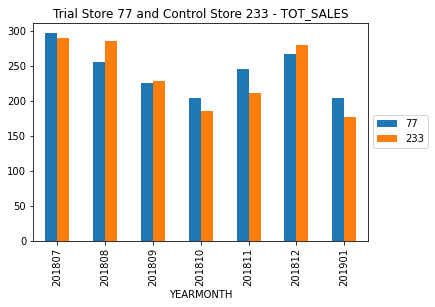

KeyError: 'nCustomers'

In [46]:
trial_control_dic = {77:233, 86:155, 88:40}
for key, val in trial_control_dic.items():
    pretrial_full_obs[pretrial_full_obs["STORE_NBR"].isin([key, val])].groupby(
        ["YEARMONTH", "STORE_NBR"]).sum()["TOT_SALES"].unstack().plot.bar()
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.title("Trial Store "+str(key)+" and Control Store "+str(val)+" - TOT_SALES")
    plt.show()
    pretrial_full_obs[pretrial_full_obs["STORE_NBR"].isin([key, val])].groupby(
    ["YEARMONTH", "STORE_NBR"]).sum()['nCustomers'].unstack().plot.bar()
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.title("Trial Store "+str(key)+" and Control Store "+str(val)+" - nCustomer")
    plt.show()
    print('\n')


We can see that Trial store 77 sales for Feb, March, and April exceeds 95% threshold of control store. Same goes to store 86 sales for all 3 trial months.

Trial store 77: Control store 233
Trial store 86: Control store 155
Trial store 88: Control store 40
Both trial store 77 and 86 showed significant increase in Total Sales and Number of Customers during trial period. But not for trial store 88. Perhaps the client knows if there's anything about trial 88 that differs it from the other two trial.
Overall the trial showed positive significant result.